# Part 1: SVD

In [ ]:
#Imports
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

In [ ]:
base_images = os.listdir("faces")
X = np.ones((len(base_images),2500))

In [45]:
#Construct x as a num_images x 2500 vector
#Each row of x is an image
i = 0
for image_name in base_images:
  img_name="faces/" + image_name
  # Read image
  img=mpimg.imread(img_name) #Import images
  # Reshape image to a 2500 length row vector
  fimg = np. reshape(img, 50*50)
  X[i,:] = fimg
  i = i + 1
#Find mu, the average image
mu = np.average(X, axis=0)

#Subtract mu from x
X = X - mu

In [ ]:
# SVD
u, s, vh = np.linalg.svd(X, full_matrices=False)

#Total size of eigenvectors
squared_s = np.square(s)
total = np.sum(squared_s)

#Find k such that the 90% of the information is explained by k
threshold = 0.9
k = 0
sum = 0
while(sum / total < threshold):
  sum = sum + squared_s[k]
  k = k + 1


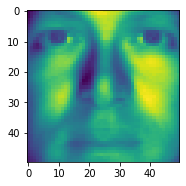

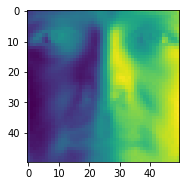

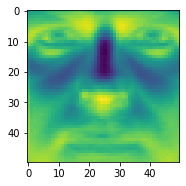

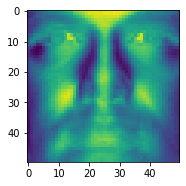

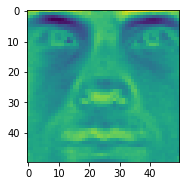

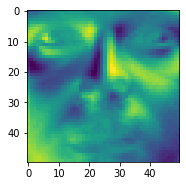

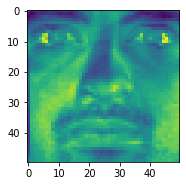

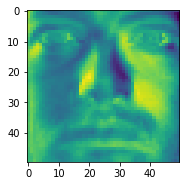

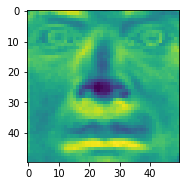

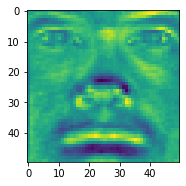

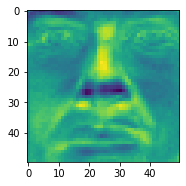

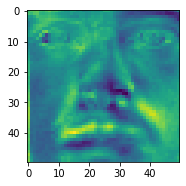

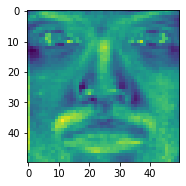

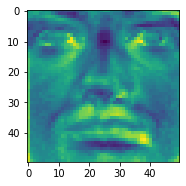

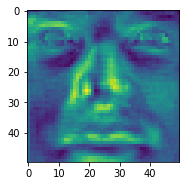

In [ ]:
#Get the first k row vectors of v_h
v_prime = vh[0:k]

#Display the eigenfaces
for eigenface in v_prime:
  f = plt.figure()
  f.add_subplot(1,2, 1)
  imgplot = plt.imshow(np.reshape(eigenface,(50,50)))

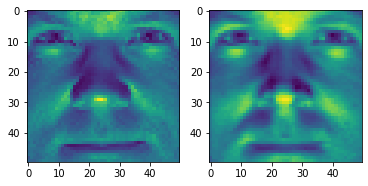

In [48]:
#Pick an image from X and display it
ex_img = X[100] + mu
f = plt.figure()
f.add_subplot(1,2, 1)
imgplot = plt.imshow(np.reshape(ex_img,(50,50)))

#Recenter ex_img by subtracting mu
ex_img = ex_img - mu

#Get the projection of the example image
w = np.dot(v_prime, ex_img)

#Reconstruct the image
y_prime = np.dot(v_prime.T,w)
re_img = y_prime + mu

#display reconstructed image (these are clearly similar by inspection)
f.add_subplot(1,2, 2)
imgplot = plt.imshow(np.reshape(re_img,(50,50)))

# Part 5: Image Segmentation Using Clustering

In [ ]:
#Necessary Imports: KMeans, numpy, matplotlib.image and matplotlib.pyplot
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


(99, 100, 3)


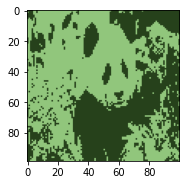

In [ ]:
#Import panda.jpeg. I will do wm.jpeg below.
img=mpimg.imread("panda.jpeg")

# downsample image and convert it to double
img = img.astype(np.float64)
img2=img[::8,::14,::1]

# reshape to 2-d
fimg = img2.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(fimg)

#recolor the pixels of the image to the cluster means
for i in range(fimg.shape[0]):
  my_cluster = kmeans.labels_[i]
  fimg[i,:] = kmeans.cluster_centers_[my_cluster,:]

#reconvert the image to uint8 and display it
fimg = fimg.astype(np.uint8)

f = plt.figure()
f.add_subplot(1,2, 1)
imgplot = plt.imshow(np.reshape(fimg, (99,100,3)))

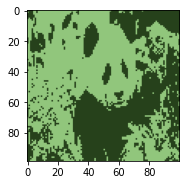

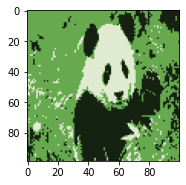

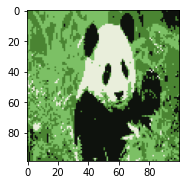

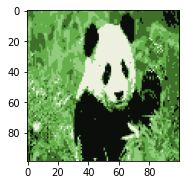

In [ ]:
#Experiment with cluster numbers 2-5
for n_cluster in range(2,6):
  fimg = img2.reshape(-1, 3)
  kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(fimg)

  #recolor the pixels of the image to the cluster means
  for i in range(fimg.shape[0]):
    my_cluster = kmeans.labels_[i]
    fimg[i,:] = kmeans.cluster_centers_[my_cluster,:]

  #reconvert the image to uint8 and display it
  fimg = fimg.astype(np.uint8)

  f = plt.figure()
  f.add_subplot(1,2, 1)
  imgplot = plt.imshow(np.reshape(fimg, (99,100,3)))

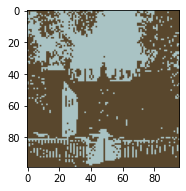

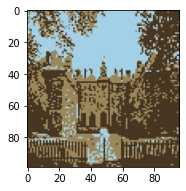

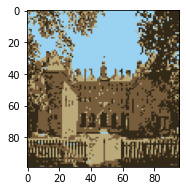

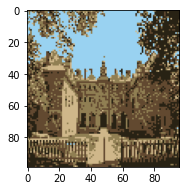

In [ ]:
#Repeat the above with wm.jpeg 
#(just the loop, don't need to do k = 2 clusters twice)
img=mpimg.imread("wm.jpeg")
#print(img.shape)

# downsample image and convert it to double
img = img.astype(np.float64)
img2=img[::11,::20,::1]
#print(img2.shape)

#Experiment with cluster numbers 2-5
for n_cluster in range(2,6):
  fimg = img2.reshape(-1, 3)
  kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(fimg)

  #recolor the pixels of the image to the cluster means
  for i in range(fimg.shape[0]):
    my_cluster = kmeans.labels_[i]
    fimg[i,:] = kmeans.cluster_centers_[my_cluster,:]

  #reconvert the image to uint8 and display it
  fimg = fimg.astype(np.uint8)

  f = plt.figure()
  f.add_subplot(1,2, 1)
  imgplot = plt.imshow(np.reshape(fimg, (99,96,3)))